In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path='D:/test_pic/2.jpg'
imag=cv2.imread(path,1)
cv2.imshow('image',imag)
cv2.waitKey(0)
cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

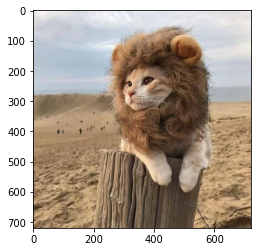

In [3]:
img = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show

In [4]:
#灰度处理
(b1,g1,r1)=cv2.split(img)
hd_img = r1*0.3+g1*0.59+b1*0.11
hd_img=np.asarray(hd_img,np.uint8)
cv2.imshow('hd image',hd_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

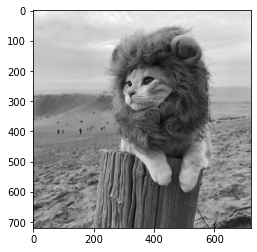

In [5]:
img_h = cv2.cvtColor(hd_img, cv2.COLOR_BGR2RGB)
plt.imshow(img_h)
plt.show

In [6]:
#线性变换
def c_linear_img(w,b,r_img):
    linear_img = w * r_img + b
    #linear_img=np.uint8(linear_img+0.5)
    #linear_img.max() 
    return linear_img

In [7]:
#截断
#w=1.5,b=10;对比度上升
linear_img = c_linear_img(1.5,10,imag)
print(linear_img.max())
linear_img[linear_img>255] = 255
print(linear_img.max())
linear_img = np.asarray(linear_img, np.uint8) # 像素值变为整数
#矩阵的数据类型是np.uint8，浮点数类型会有显示异常情况
cv2.imshow('linear image', linear_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

392.5
255.0


<function matplotlib.pyplot.show(close=None, block=None)>

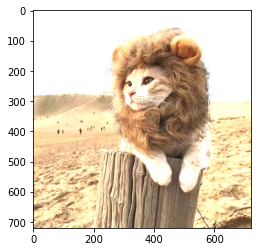

In [8]:
img1 = cv2.cvtColor(linear_img, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show

In [9]:
#非线性变换_对数变换
def c_log_image(c,b,r_imag):
    new_image = c*np.log(1.0+r_imag)+b
    #new_image=np.uint8(new_image+0.5)
    return new_image

In [10]:
#输出
log_img=c_log_image(10,20,imag)
log_img[log_img>255] = 255
log_img = np.asarray(log_img, np.uint8)
cv2.imshow('log image', log_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

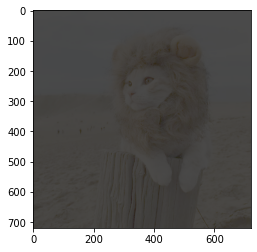

In [11]:
img2 = cv2.cvtColor(log_img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show

In [12]:
#非线性变换_指数变换
def c_ex_image(c,b,r_img):
    ex_image = c*np.power(r_img,b)
    return ex_image

In [13]:
ex_image = c_ex_image(2,1.00000000000000000000000000000000000000000000000000000000000000000000000000000000001,imag)
ex_image[ex_image>255]=255
ex_image = np.asarray(ex_image, np.uint8)
cv2.imshow('ex image', ex_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

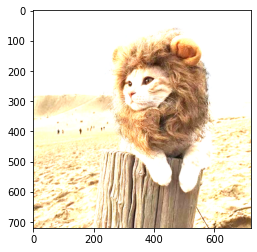

In [14]:
img3 = cv2.cvtColor(ex_image, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show

In [15]:
#伽马变化
def gammaconvert(image,gamma):
    table=[]
    for i in range(256):
        table.append(((i/255.0)**gamma)*255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(image,table)

In [16]:
gamma_imag = gammaconvert(imag,1/3)
cv2.imshow('gamma image',gamma_imag)
cv2.waitKey(0)
cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

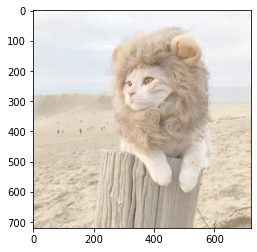

In [27]:
gi = cv2.cvtColor(gamma_imag, cv2.COLOR_BGR2RGB)
plt.imshow(gi)
plt.show

In [17]:
#彩色直方图
def jishu_z(r_imag):
    color = ('b','g','r')
    for id,bgrcolor in enumerate(color):
        hist = cv2.calcHist([r_imag],[id],None,[256],[0.0,255.0])
        plt.plot(hist, color=bgrcolor)
    plt.show()

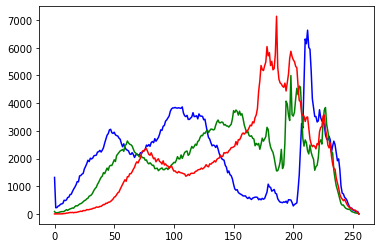

In [18]:
jishu_z(imag)

In [19]:
#概率密度直方图
def gl_1_z(r_imag):
    color = ('b','g','r')
    for id,bgrcolor in enumerate(color):
        plt.hist(img[:,:,id].flatten(),bins=256,density=True,color = bgrcolor,alpha=.7)
    plt.show()

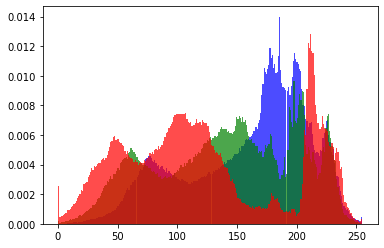

In [20]:
gl_1_z(imag)

In [21]:
import seaborn as sns
def gl_2_z(r_imag):
    color = ('b','g','r')
    for id,bgrcolor in enumerate(color):
        sns.kdeplot(img[:,:,id].flatten(),shade=True,color = bgrcolor,label = bgrcolor,alpha = .7)
        plt.show()

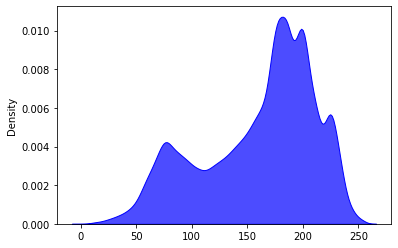

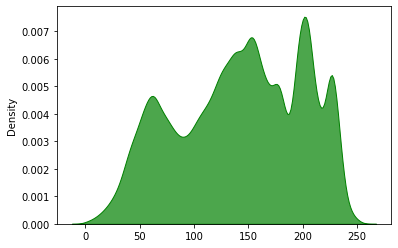

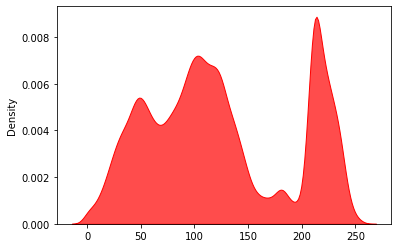

In [22]:
gl_2_z(imag)

In [23]:
#均衡化
def EqualizeHist(img):
    (b,g,r)=cv2.split(img)
    
    bh = cv2.equalizeHist(b)
    gh = cv2.equalizeHist(g)
    rh = cv2.equalizeHist(r)
    
    result = cv2.merge((bh,gh,rh))
    return result

In [24]:
eq_img = EqualizeHist(imag)
cv2.imshow('eq image', eq_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

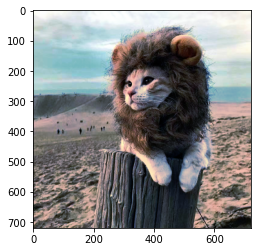

In [25]:
img4 = cv2.cvtColor(eq_img, cv2.COLOR_BGR2RGB)
plt.imshow(img4)
plt.show

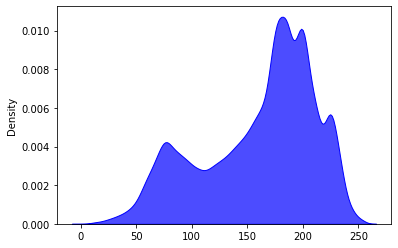

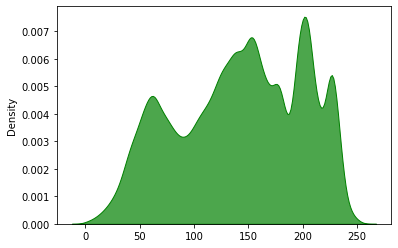

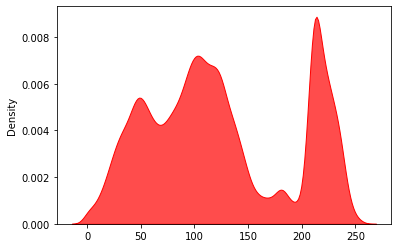

In [26]:
gl_2_z(eq_img)